In [ ]:
# Алексеев Д.П. (DSU-4, STPY-21)
# Домашнее задание «Корреляция и корреляционный анализ» (#4)

# Возьмите датасет Mortality and Water Hardness**
# https://www.kaggle.com/ukveteran/mortality-and-water-hardness
    
# В этом датасете содержатся данные по средней годовой смертности на
# 100000 населения и концентрации кальция в питьевой воде для 61
# большого города в Англии и Уэльсе. Города дополнительно поделены на
# северные и южные.

# Задание 1.
# Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
# -Построить точечный график
# -Рассчитать коэффициенты корреляции Пирсона и Спирмена
# -Построить модель линейной регрессии
# -Рассчитать коэффициент детерминации
# -Вывести график остатков

# Задание 2.
# Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# -Разделить данные на 2 группы
# -Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\\Netology\\Statistics\\Practice\\Kaggle_Mortality and Water Hardness\\water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

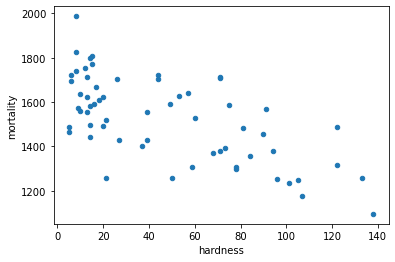

In [3]:
# Задание 1.
# Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?
# -Построить точечный график
df.plot(kind='scatter', x='hardness', y='mortality')

# вывод: из графика наблюдается обратная зависимость

In [4]:
# -Рассчитать коэффициенты корреляции Пирсона и Спирмена

# коэффициент Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# коэффициент Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

# вывод: какая-то странная обратная взаимосвязь (обратная, т.к. получился отрицательный коэфф. корреляции): 
# чем выше жесткость воды, тем ниже смертность???

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
# -Построить модель линейной регрессии
X = df[['hardness']]
y = df['mortality']

# возьмем 20%-ную (а не 30%-ную) тестовую выборку из-за небольшого объема данных в датасете (всего 61 строка)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('Коэффициент a: ', lr.coef_[0])
print('Коэффициент b: ', lr.intercept_)

Коэффициент a:  -3.282818453352771
Коэффициент b:  1683.9212680875548


In [7]:
y_pred = lr.predict(X_test)
y_pred

array([1339.22533049, 1651.09308355, 1637.96180974, 1539.47725614,
       1427.86142873, 1618.26489902, 1247.30641379, 1437.70988409,
       1614.98208057, 1664.22435737, 1490.23497934, 1418.01297337,
       1555.89134841])

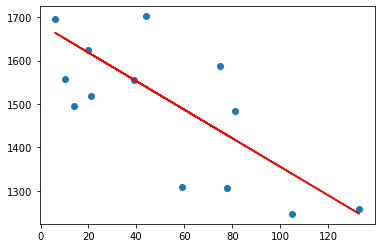

In [8]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# вывод: обращает на себя внимание сильный разброс тестовых точек (X_test, y_test) от красной прямой, 
# предсказанной по рассчитанной формуле линейной регрессии (y = -3.282818453352771*x + 1683.9212680875548) 

In [9]:
# -Рассчитать коэффициент детерминации
lr.score(X_test, y_test)

0.5099679408034544

In [ ]:
# вывод: судя по невысокому коэфф-ту детерминации, построенная модель не очень хорошо объясняет взаимосвязь 
# между жесткостью воды и смертностью: либо взаимосвязь слабая/отсутствует, либо нелинейная.

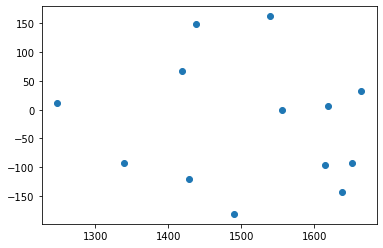

In [12]:
# -Вывести график остатков
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)

# наблюдается хаотичное распределение остатков

In [11]:
# Задание 2.
# Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
# -Разделить данные на 2 группы
df_south = df[ df['location'] == 'South' ]
df_north = df[ df['location'] == 'North' ]

# -Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

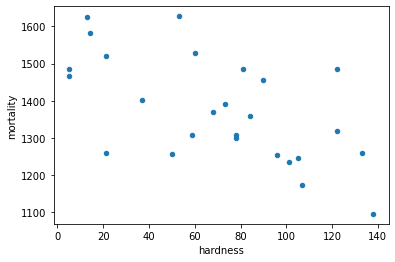

In [13]:
# Юг
df_south.plot(kind='scatter', x='hardness', y='mortality')

In [14]:
# -Рассчитать коэффициенты корреляции Пирсона и Спирмена

# коэффициент Пирсона
df_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [15]:
# коэффициент Спирмена
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [16]:
# -Построить модель линейной регрессии
X = df_south[['hardness']]
y = df_south['mortality']

# возьмем 20%-ную (а не 30%-ную) тестовую выборку из-за небольшого объема данных в датасете 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr_south = LinearRegression()
lr_south.fit(X_train, y_train)

print('Коэффициент a: ', lr_south.coef_[0])
print('Коэффициент b: ', lr_south.intercept_)

Коэффициент a:  -3.0746612681876426
Коэффициент b:  1595.4337548999538


In [17]:
y_pred = lr_south.predict(X_test)
y_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

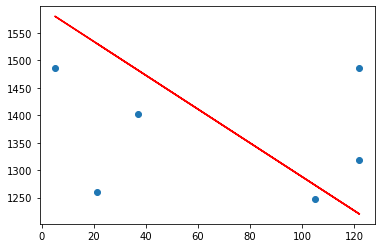

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [19]:
# -Рассчитать коэффициент детерминации
lr_south.score(X_test, y_test)

-1.9300174406554644

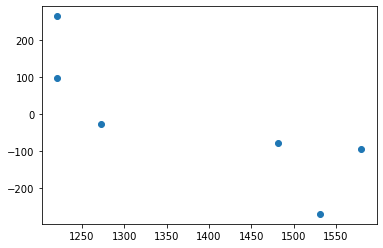

In [20]:
# -Вывести график остатков
residuals_south = y_test - y_pred
plt.scatter(y_pred, residuals_south)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

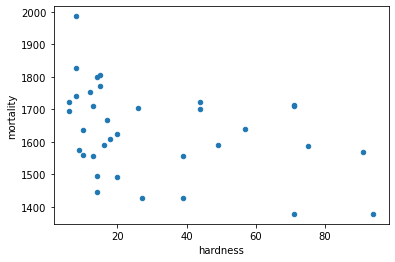

In [21]:
# Север
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [22]:
# -Рассчитать коэффициенты корреляции Пирсона и Спирмена

# коэффициент Пирсона
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [23]:
# коэффициент Спирмена
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [24]:
# -Построить модель линейной регрессии
X = df_north[['hardness']]
y = df_north['mortality']

# возьмем 20%-ную (а не 30%-ную) тестовую выборку из-за небольшого объема данных в датасете 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr_north = LinearRegression()
lr_north.fit(X_train, y_train)

print('Коэффициент a: ', lr_north.coef_[0])
print('Коэффициент b: ', lr_north.intercept_)

Коэффициент a:  -2.2503888831276564
Коэффициент b:  1694.905301402942


In [25]:
y_pred = lr_north.predict(X_test)
y_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

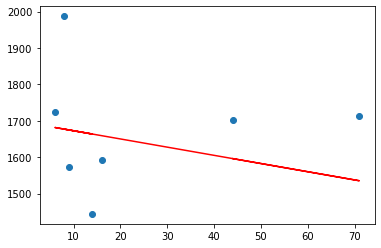

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [27]:
# -Рассчитать коэффициент детерминации
lr_north.score(X_test, y_test)

-0.18101539518829401

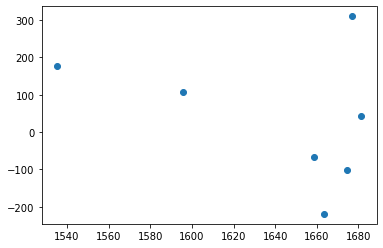

In [28]:
# -Вывести график остатков
residuals_north = y_test - y_pred
plt.scatter(y_pred, residuals_north)

In [ ]:
# Выводы после разделения выборки на Юг и Север:
#     1) Аналогичная зависимость НЕ сохраняется. Прогнозная модель после разделения на Юг и Север не улучшилась, а ухудшилась 
#     (сильноотриц.коэфф. детерминации -1.93 по Югу, близкий к нулю  -0.18 по Северу). 
#     2) объем выборки небольшой, не даёт построить более точную модель. Но даже на таких малых данных можно сделать вывод, 
#     что линейная зависимость смертности от жёсткости воды отсутствует 
#     (сомневаюсь, что и на большом объеме данных будет обнаружена какая-либо зависимость - хоть линейная, хоть нелинейная).